<a href="https://colab.research.google.com/github/Alisonjs0/uninassau-atividade-alunos-ml-regressao/blob/main/ETAPA_3_DELIVERYTIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2. Carregar dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving delivery_time_final.csv to delivery_time_final.csv


In [ ]:
df = pd.read_csv("delivery_time_final.csv")
df.head()

,delivery_id,distance_km,package_weight_kg,driver_experience_years,num_stops,customer_rating,fuel_cost,delivery_time_hours,wellbeing_score,delivery_type_express,...,time_of_day_noite,time_of_day_tarde,day_of_week_seg-qui,day_of_week_sexta,day_of_week_sábado,is_priority_yes,package_fragile_yes,delivery_zone_suburbana,delivery_zone_urbana,delivery_speed_kmh
0,DEL00331,0.212253,2.647201,0.091559,3.108428,1.700263,-0.126139,0.384929,-0.273771,True,...,False,True,False,False,False,False,False,False,True,0.551407
1,DEL02382,-0.465047,-0.674816,1.179863,-0.081985,1.554082,0.288737,0.005903,0.432710,False,...,False,False,True,False,False,False,True,False,True,-78.762651
2,DEL00825,1.114955,-0.868911,-0.271209,-0.879588,0.092268,0.807332,-1.690263,0.042140,True,...,False,False,True,False,False,False,True,False,True,-0.659634
3,DEL00336,-0.160864,0.698782,0.817095,-0.879588,-1.745441,-0.216893,0.615012,-0.465434,False,...,False,True,False,False,False,True,True,True,False,-0.261562
4,DEL00551,-0.149922,-0.055204,-1.359513,-0.879588,0.781409,1.377787,0.436058,-0.819789,False,...,False,False,False,False,True,False,True,False,True,-0.343811


3. Limpeza + Pré-processamento

In [ ]:
# Remover coluna de ID se existir
if "delivery_id" in df.columns:
    df = df.drop(columns=["delivery_id"])

# Tratar valores faltantes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.head()


,distance_km,package_weight_kg,driver_experience_years,num_stops,customer_rating,fuel_cost,delivery_time_hours,wellbeing_score,delivery_type_express,delivery_type_standard,...,time_of_day_noite,time_of_day_tarde,day_of_week_seg-qui,day_of_week_sexta,day_of_week_sábado,is_priority_yes,package_fragile_yes,delivery_zone_suburbana,delivery_zone_urbana,delivery_speed_kmh
0,0.212253,2.647201,0.091559,3.108428,1.700263,-0.126139,0.384929,-0.273771,True,False,...,False,True,False,False,False,False,False,False,True,0.551407
1,-0.465047,-0.674816,1.179863,-0.081985,1.554082,0.288737,0.005903,0.432710,False,False,...,False,False,True,False,False,False,True,False,True,-78.762651
2,1.114955,-0.868911,-0.271209,-0.879588,0.092268,0.807332,-1.690263,0.042140,True,False,...,False,False,True,False,False,False,True,False,True,-0.659634
3,-0.160864,0.698782,0.817095,-0.879588,-1.745441,-0.216893,0.615012,-0.465434,False,True,...,False,True,False,False,False,True,True,True,False,-0.261562
4,-0.149922,-0.055204,-1.359513,-0.879588,0.781409,1.377787,0.436058,-0.819789,False,True,...,False,False,False,False,True,False,True,False,True,-0.343811


4. Separar features e target

In [ ]:
X = df.drop(columns=["delivery_time_hours"])
y = df["delivery_time_hours"]


5. Divisão dos dados (60/20/20)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

X_train.shape, X_val.shape, X_test.shape


((1506, 30), (502, 30), (502, 30))

6. Treinar regressão linear

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

7. Previsões

In [ ]:
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)


8. Função de métricas

In [ ]:
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


9. Calcular métricas

In [ ]:
train_metrics = metrics(y_train, pred_train)
val_metrics = metrics(y_val, pred_val)
test_metrics = metrics(y_test, pred_test)

print("Treino:", train_metrics)
print("Validação:", val_metrics)
print("Teste:", test_metrics)


Treino: (0.05216186936311111, np.float64(0.22838973129961668), 0.1594049858765491, 0.9479503599675067)
Validação: (0.06471042265355596, np.float64(0.2543824338541401), 0.17471700915736058, 0.936153787508999)
Teste: (0.0666727815770656, np.float64(0.2582107309487071), 0.17119228212086246, 0.9319088046713244)


Top 3 features:

In [ ]:
coef_df.iloc[:3]

,feature,coef
42,weather_Tempestade,14.588422
64,day_of_week_domingo,8.003033
38,weather_Chuva Forte,6.889868


10. Importância das variáveis

In [ ]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": model.coef_
}).sort_values(by="coef", ascending=False)

coef_df.head(10)


,feature,coef
18,weather_tempestade,0.584960
13,traffic_condition_congestionado,0.455964
21,time_of_day_tarde,0.299834
20,time_of_day_noite,0.199325
19,time_of_day_manhã,0.158438
3,num_stops,0.130653
24,day_of_week_sábado,0.117444
0,distance_km,0.081465
23,day_of_week_sexta,0.074376
1,package_weight_kg,0.072742


11. Top 3

In [ ]:
coef_df.iloc[:3]


,feature,coef
18,weather_tempestade,0.584960
13,traffic_condition_congestionado,0.455964
21,time_of_day_tarde,0.299834


12. Gráfico de resíduos (validação)

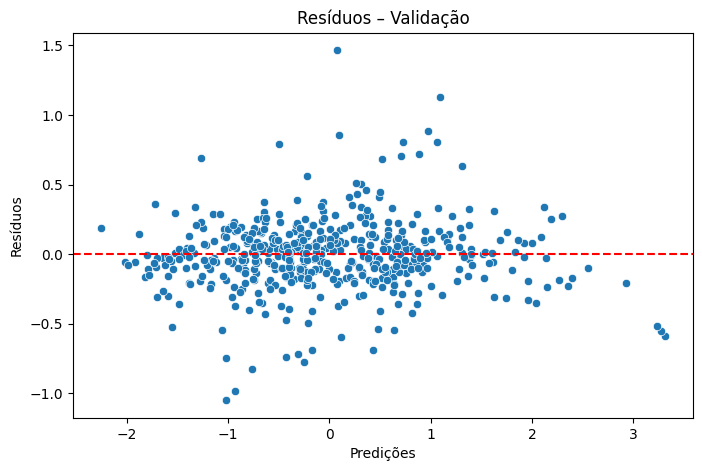

In [ ]:
residuals = y_val - pred_val

plt.figure(figsize=(8,5))
sns.scatterplot(x=pred_val, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predições")
plt.ylabel("Resíduos")
plt.title("Resíduos – Validação")
plt.show()


13. Comparação treino vs validação (overfitting)

In [ ]:
print(f"R² Treino: {train_metrics[3]:.3f}")
print(f"R² Validação: {val_metrics[3]:.3f}")
print("Diferença:", abs(train_metrics[3] - val_metrics[3]))



R² Treino: 0.948
R² Validação: 0.936
Diferença: 0.011796572458507626


14. Tabela final para apresentação

In [ ]:
results = pd.DataFrame({
    "Conjunto": ["Treino", "Validação", "Teste"],
    "MSE": [train_metrics[0], val_metrics[0], test_metrics[0]],
    "RMSE": [train_metrics[1], val_metrics[1], test_metrics[1]],
    "MAE": [train_metrics[2], val_metrics[2], test_metrics[2]],
    "R²": [train_metrics[3], val_metrics[3], test_metrics[3]]
})

results


,Conjunto,MSE,RMSE,MAE,R²
0,Treino,0.052162,0.228390,0.159405,0.947950
1,Validação,0.064710,0.254382,0.174717,0.936154
2,Teste,0.066673,0.258211,0.171192,0.931909
